#### KNN - K Nearest Neighbours
- Supervised ML technique used in classification and regression but is generally used for Classsification problems.
- This non parametric algorithm is so simple that it doesn't do any actual “learning” — yet it is still heavily used in many computer vision algorithms
- It is baseline algorithm in many applications - any algorithm should have accuracy greater or equal to knn
- The K-nearest neighbor classifier offers an alternative approach to classification using lazy learning that allows us to make predictions without any model training but at the cost of expensive prediction step
- KNN is a memory-based approach is that the classifier immediately adapts as we collect new training data
- It has no learning process and prediction for new data points is made by looking at the nature of the nearest neighbours.

Advantage: k-NN is a memory-based approach is that the classifier immediately adapts as we collect new training data.

Disadvantage: The computational complexity for classifying new samples grows linearly with the number of samples in the training dataset in the worst-case scenario.

#### Examples of real-life use of KNN:
- Microbiology (for classifying cells)
- Marketing (for customer segmentation)
- Credit Fault Analytics
- K-nearest neighbor is also used in retail to detect patterns in credit card usage. Many new transaction-scrutinizing software applications use kNN algorithms to analyze register data and spot unusual patterns that indicate suspicious activity.

- For example, if register data indicates that a lot of customer information is being entered manually rather than through automated scanning and swiping, this could indicate that the employee who’s using that register is in fact stealing customer’s personal information. Or if register data indicates that a particular good is being returned or exchanged multiple times, this could indicate that employees are misusing the return policy or trying to make money from doing fake returns.

- The modern systems are now able to use k-nearest neighbor for visual pattern recognition to scan and detect hidden packages in the bottom bin of a shopping cart at check-out. If an object is detected that’s an exact match for an object listed in the database, then the price of the spotted product could even automatically be added to the customer’s bill. While this automated billing practice is not used extensively at this time, the technology has been developed and is available for use.

#### TIME COMPLEXITY

- Train : O(1) as it is non parametric algorithm (not learn any parameters in training data ; like in regression algorithm we learn m and c from training data) . Here , we are doing computation directly on Run-Time
- Test : O(NQ) where N is no of samples in training data and Q is no of samples in test data

#### Building KNN Model
- Plot the training dataset
- Locate the new 'test' instance
- Calculate the distance from all train data points
- Sort the distance list in ascending order
- Choose first K distances from the sorted list and their corresponding output
- Make prediction for datapoint based on k-nearest neighbours - take Mode of labels of the nearest neighbours i.e Assign the class label by majority vote
- For Classification problems - New Instance = MODE and for Regression problems - New Instance = MEAN

#### Determining right value of K using Elbow Method
- Choose a range of values of K - min : 1 and max : n (no of data points)
- For each value , implement a KNN Model
- Calculate error corresponding to each K value and plot it (K-value on X-axis and Error on Y-axis) and choose value of K with minimum error in Elbow Curve

#### Issues with Distance based Algorithms
- Takes the distance between points into account

- Fails when variables have different scales because there is a huge different in the scale and relative distance between points changes which might lead to ambiguous interpretations

- While working with any distance based algorithm , make sure there is no large differences in the variables and ensure that you scale your variables down and bring them to the same scale range

- Therefore, standardization or normalization is very important

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets 

In [2]:
# LOAD THE DATA
# cleaned version of Titanic Survivor Dataset - computed missing values and all categorical values are encoded in numbers

data = pd.read_csv('titanic-data-for-knn.csv') 
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape

(891, 25)

In [4]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# SEGREGATING VARIABLES - INDEPENDENT AND DEPENDENT VARIABLES

x = data.iloc[:,1:]
y = data['Survived']      
print(x.shape , y.shape)

(891, 24) (891,)


In [6]:
# Split into train and test data

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=0 , test_size=0.2 , stratify=y)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(712, 24) (179, 24) (712,) (179,)


In [7]:
# Normalize the data into range 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
# Implement knn classifier now

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

clf.fit(x_train_scaled , y_train)

print("Training Acc: " + str(clf.score(x_train_scaled , y_train)))
print("Test Acc: "+  str(clf.score(x_test_scaled , y_test)))

Training Acc: 0.8553370786516854
Test Acc: 0.7653631284916201


In [9]:
# Checking cross validation scores on Train set

from sklearn.metrics import f1_score , accuracy_score
from sklearn.model_selection import cross_val_score , KFold

cross_val_score(clf , x_train_scaled , y_train , cv=KFold(10 , shuffle=True , random_state=0))

array([0.86111111, 0.79166667, 0.81690141, 0.73239437, 0.73239437,
       0.77464789, 0.74647887, 0.8028169 , 0.78873239, 0.78873239])

In [10]:
print(cross_val_score(clf , x_train_scaled , y_train , cv=KFold(10 , shuffle=True , random_state=0)).mean())
print(cross_val_score(clf , x_train_scaled , y_train , cv=KFold(10 , shuffle=True , random_state=0)).std())

0.7835876369327073
0.03782347183479312


In [11]:
# Visualizing cross validation scores for different values of K neighbours

x_axis = []
y_axis = []
vals = []

for i in range(1, 100, 2):
    
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf , x_train_scaled , y_train , cv = 5).mean()

    x_axis.append(i)
    y_axis.append(score)  
    
    vals.append((score , i))

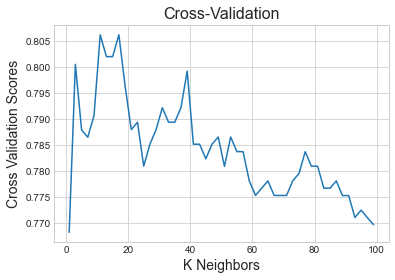

In [12]:
plt.style.use('seaborn-whitegrid')
plt.plot(x_axis , y_axis)

plt.xlabel('K Neighbors' , fontsize = 14)
plt.ylabel('Cross Validation Scores' , fontsize = 14)
plt.title('Cross-Validation' , fontsize = 16)
plt.show()

In [14]:
# Top-5 best values for K

vals = list(zip(y_axis , x_axis))
sorted(vals , reverse=True)[:5]

[(0.8061755146262188, 17),
 (0.806155816014971, 11),
 (0.8019698611247907, 15),
 (0.8019698611247907, 13),
 (0.8004826159755737, 3)]

In [26]:
# ELBOW CURVE - CALCULATING ERROR FOR DIFFERENT VALUES OF K

errors = []
x_axis = []
vals = []

for i in range(1,50,2):
    
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train_scaled , y_train)
    
    y_pred = clf.predict(x_test_scaled)
    
    score = f1_score(y_pred , y_test)
    err = 1-score
    
    errors.append(err)
    x_axis.append(i)
    
    vals.append((err , i))   

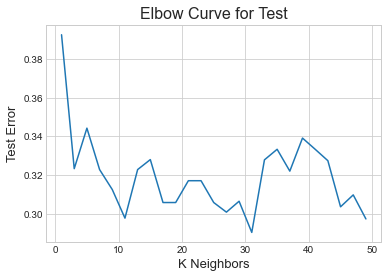

In [27]:
plt.plot(x_axis , errors)

plt.xlabel('K Neighbors' , fontsize = 13)
plt.ylabel('Test Error' , fontsize = 13)
plt.title('Elbow Curve for Test' , fontsize = 16)
plt.show()

In [28]:
vals = list(zip(errors , x_axis))
sorted(vals)[:5]

[(0.29032258064516137, 31),
 (0.2972972972972975, 49),
 (0.2977099236641222, 11),
 (0.3008130081300814, 27),
 (0.3035714285714285, 45)]

In [29]:
# Final prediction with best K value

# CREATING INSTANCE OF KNN Classifier
clf = KNeighborsClassifier(n_neighbors = 31)
clf.fit(x_train_scaled , y_train)  

KNeighborsClassifier(n_neighbors=31)

In [32]:
# Making Predictions and Evaluating

test_predict = clf.predict(x_test_scaled)
acc = accuracy_score(test_predict , y_test)
print('Test Accuracy Score ', acc*100)

Test Accuracy Score  79.88826815642457
